In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt

In [2]:
np.random.seed(101) 
tf.set_random_seed(101)

In [3]:
#Cargar el conjunto de datos
data=np.load('proyecto_training_data.npy')


#Obtener el total de registros
totalLen=len(data)

#Calcular el largo de los registros de entrenamiento y de prueba
trainingLen=int(totalLen*0.8)
testLen=int(totalLen*0.2)

#Obtener los datos de entrenamiento
trainingData=data[0:trainingLen]

#Eliminar los valores con valores no numéricos para funciones que no manejan nan
trainingData_zero=np.nan_to_num(trainingData)
testData=data[trainingLen:]

x=trainingData[:,1]
y=trainingData[:,0]


  
n = len(x) # Number of data points

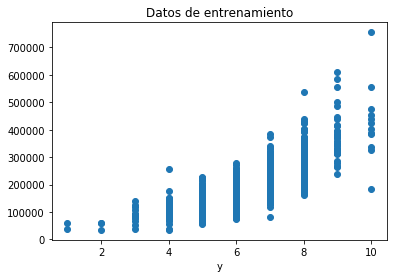

In [4]:
# Graficar datos de entrenamiento
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Datos de entrenamiento") 
plt.show() 

In [5]:
learning_rate = 0.1
training_epochs = 500

In [6]:
# Inicializar la sesión de tensorflow


def regresionTensorFlow(x,y,learning_rate):
    
    X = tf.placeholder("float") 
    Y = tf.placeholder("float")
    
    
    W = tf.Variable(40000.0, name = "W") 
    b = tf.Variable(-40000.0, name = "b")
    
    # Hipotesis
    y_pred = tf.add(tf.multiply(X, W), b) 

    # Funcion de costo
    cost = tf.reduce_mean(tf.pow(y_pred-Y, 2)) / (2 * n) 

    # Optimizador de gradiente
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

    # Inicializar variables globales
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess: 

        # Inicializar variables
        sess.run(init) 


        for epoch in range(training_epochs): 

            sess.run(optimizer, feed_dict = {X : x, Y : y}) 


            writer = tf.summary.FileWriter('./graphs', sess.graph)

            # Displaying the result after every 50 epochs 
            if (epoch + 1) % 500 == 0: 
                # Calculating the cost a every epoch 
                c = sess.run(cost, feed_dict = {X : x, Y : y}) 
                print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
            writer.close()
        # Storing necessary values to be used outside the Session 
        #training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
        #weight = sess.run(W) 
        #bias = sess.run(b) 


In [7]:
print("Utilizando 1 como taza de aprendizaje")
regresionTensorFlow(x,y,1)

#print("Utilizando 0.1 como taza de aprendizaje")
#regresionTensorFlow(x,y,0.1)

#print("Utilizando 0.01 como taza de aprendizaje")
#regresionTensorFlow(x,y,0.01)


Utilizando 1 como taza de aprendizaje
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 500 : cost = 1044363.25 W = 36850.8 b = -41641.715


In [8]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Costo =", training_cost, "Peso =", weight, "sesgo =", bias, '\n') 


NameError: name 'weight' is not defined

In [ ]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Datos experimentales') 
plt.plot(x, predictions, label ='Hipótesis') 
plt.title('Resultado de la regresión lineal') 
plt.legend() 
plt.show()

<img src="https://i.imgur.com/ensT5uu.png">